# **Emotion Detection & Music Recommendation**

17102040 Tae Hyeon Kwon

18102082 Su Kyoung Oh


---



#Table of Contents

###[Original Plan]
<ol type = "I"> 
<li> Motivation & Problem Statement</li>
<li> Datasets</li> </ol>

###[Our Project]
Part 1. Face Recognition

<br>

Part 2. Emotion Detection
<ol type = "I">
<li>   Trials & Choices</li>
<li>   Final Result</li>
<li>   Analysis</li>
</oi> 




Part 3. Music Remmendation
<ol type = "I">
<li>   Trials & Choices</li>
<li>   Result</li>
<li>   Analysis</li>
</oi>

#Original Plan 
##Mood-based Music Recommendation

###I. Motivation & Problem Statement
> Emotion Detection

Facial recognition is the technology that we were both always interested in. It is widely applied in various areas and among them, we wanted to do our project on facial recognition that precisely identifies facial expressions. Compared to text or speech, facial expression is the easiest way to recognize one’s current feelings. Instead of limiting ourselves in handling only emotion detection, we wanted to go further and apply it to something we are passionate about which is music.

> Music Recommendation based on 7 Emotions

Music is a powerful language to express our feelings and in many cases is used as a therapy to deal with tough moments in our lives. Emotions can be easily reflected in music. When doing sports, people tend to listen to energetic music and when anxious or tired, a relaxed song can help one calm down. Therefore, as people tend to listen to music that fits their current mood, we decided our project to be song recommendation based on mood that is detected by facial recognition. By suggesting suitable playlists of songs, it would no longer be time consuming for people to find songs of their preference among thousands of choices.

<br>

###2. Datasets
> Pinterest Face Dataset


* 105 celebrities & 17534 faces
* https://www.kaggle.com/hereisburak/pins-face-recognition/code 

 <img src="https://drive.google.com/uc?id=1UKY_pJ9NjZunMTr9GSGKdWWZcO6bxiWk" width="400">


> FER-2013 Dataset


* A large-scale face recognition dataset (48x48 pixel grayscale images of faces)
* Consists of training set: 28,709 , test set: 3,589 labelled images
*Each image is labelled as one of 7 emotions (Happy, Sad, Angry, Afraid, Surprise, Disgust, Neutral)
*https://www.kaggle.com/msambare/fer2013

 <img src="https://drive.google.com/uc?id=1j3S5w9bqr3ZwPZxHENZFrYwRUYmg5YMT" width="800">

 
> Spotify Dataset

* A dataset containing music information of Spotify, the world's largest music streaming site
* 19 columns including music features such as 'Danceability', 'Energy', 'Valence', 'Loudness', 'Tempo', 'Liveness'.

<dd> - <b>Danceability</b>: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

<dd> - <b>Energy</b>: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. </dd>

<dd>- <b>Valence</b>: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 

<dd> - <b>Loudness</b>: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

<dd> - <b>Tempo</b>: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.

<dd> - <b>Liveness</b>: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.

 <img src="https://drive.google.com/uc?id=1jlNclNE2TuCzTIBIiseHnJE5wfG2_gBd" width="800">


#Our Project
##Part 1 - Face Recognition




> Load  Dataset

First, we used **MTCNN** to detect faces and crop the images accordingly.

MTCNN (Multi-Task Cascaded Convolutional Neural Networks) is a neural network which detects faces and facial landmarks on images. It was published in 2016 by Zhang et al. by using 3 types of nets (P-Net, R-Net and O-Net). The reason for choosing MTCNN is because according to the reference paper, it show great accuracy improvement compared to the existing CNN. 

<br>
Reference: Zhang et al, Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks, 2016




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3 MB 7.1 MB/s 


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN

def extract_face(image):
  img1 = Image.open(image)            
  img1 = img1.convert('RGB')         
  pixels = asarray(img1)              
  detector = MTCNN()                 
  f = detector.detect_faces(pixels)
  x1,y1,w,h = f[0]['box']             
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  store_face = pixels[y1:y2,x1:x2]
  plt.imshow(store_face)
  image1 = Image.fromarray(store_face,'RGB')   
  image1 = image1.resize((160,160))             
  face_array = asarray(image1)                  
  return face_array


def load_faces(directory):
  face = []
  i=1
  for filename in listdir(directory):
    path = directory + filename
    faces = extract_face(path)
    face.append(faces)
  return face

This is the process that to make image dataset for embedding process.

Load the image and save them to npz file


1 There are 15 images in the class Adriana Lima:
2 There are 15 images in the class Alex Lawther:
3 There are 15 images in the class Alexandra Daddario:
4 There are 15 images in the class Alvaro Morte:
5 There are 15 images in the class alycia dabnem carey:
6 There are 15 images in the class Amanda Crew:
7 There are 15 images in the class amber heard:
8 There are 15 images in the class Andy Samberg:
9 There are 15 images in the class Anne Hathaway:
10 There are 15 images in the class Anthony Mackie:
11 There are 15 images in the class barack obama:
12 There are 15 images in the class barbara palvin:
13 There are 15 images in the class Ben Affleck:
14 There are 15 images in the class Bill Gates:
15 There are 15 images in the class Bobby Morley:
16 There are 15 images in the class Brenton Thwaites:
17 There are 15 images in the class Brian J. Smith:
18 There are 15 images in the class Brie Larson:
19 There are 15 images in the class camila mendes:
20 There are 15 images in the class Chri

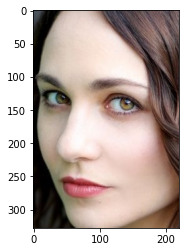

In [ ]:
def load_dataset(directory):
  x, y = [],[]
  i=1
  for subdir in listdir(directory):
    path = directory + subdir + '/'
    faces = load_faces(path)
    labels = [subdir for _ in range(len(faces))]
    print("%d There are %d images in the class %s:"%(i,len(faces),subdir))
    x.extend(faces)
    y.extend(labels)
    i=i+1
  return asarray(x),asarray(y)  


trainX,trainY = load_dataset('/content/drive/MyDrive/dataset/image/')
print(trainX.shape,trainY.shape)
savez_compressed('/content/drive/MyDrive/dataset/image.npz',trainX,trainY)



> Embeddings


We used **FaceNet Model** for embedding. (Keras FaceNet Pre-Trained Model)

FaceNet extracts high-quality features from a face in the given image and creates a vector (face embedding) with 128 elements representing these features. It was published in 2015 by Google researchers Schroff et al. According to the reference paper, the excellence of FaceNet was proven.

The embeddings are classified using SVM. SVM (Linear Support Vector Machine) creates a non-stochastic binary linear classification model that determines which category the new data belongs to based on a given data set. It is common to use SVM when working with normalized face embedding inputs. This is because the method is very effective at separating the face embedding vectors. 

<br>
Reference: William, Ivan & Setiadi, De Rosal Ignatius Moses & Rachmawanto, Eko & Santoso, Heru & Sari, Atika. (2019). Face Recognition using FaceNet (Survey, Performance Test, and Comparison). 1-6. 10.1109/ICIC47613.2019.8985786


In [ ]:
import numpy as np
from numpy import savez_compressed
from keras.models import load_model 

def extract_embeddings(model,face_pixels):
  face_pixels = face_pixels.astype('float32')  
  mean = face_pixels.mean()                   
  std  = face_pixels.std()                    
  face_pixels = (face_pixels - mean)/std       
  samples = np.expand_dims(face_pixels,axis=0)    
  yhat = model.predict(samples)
  return yhat[0]

In [ ]:
data = np.load('/content/drive/MyDrive/dataset/image.npz')
trainx, trainy = data['arr_0'],data['arr_1']
print(trainx.shape, trainy.shape)

model = load_model('/content/drive/MyDrive/dataset/facenet_keras.h5')

#get the face embeddings
new_trainx = list()
for train_pixels in trainx:
  embeddings = extract_embeddings(model,train_pixels)
  new_trainx.append(embeddings)
new_trainx = np.asarray(new_trainx)            
print(new_trainx.shape)

#compress the 128 embeddings of each face 
savez_compressed('/content/drive/MyDrive/dataset/image_embedding.npz',new_trainx,trainy)

(916, 160, 160, 3) (916,)
(916, 128)


Input test data shape:  (1, 160, 160, 3)
Input test embedding shape:  (1, 128)
Loaded data: Train=916 , Test=1


Text(0.5, 0, 'Input Image')

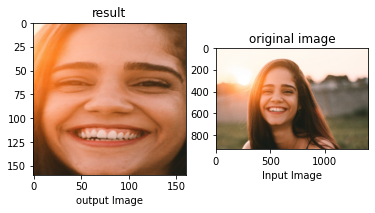

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from numpy import array
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import expand_dims
from numpy import reshape
from numpy import load
from numpy import max
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

Img = '/content/drive/MyDrive/dataset/happy_women.png'
face = extract_face(Img)
testx = face.reshape(-1,160,160,3)
print("Input test data shape: ",testx.shape)

#find embeddings
model = load_model('/content/drive/MyDrive/dataset/facenet_keras.h5')
new_testx = list()
for test_pixels in testx:
  embeddings = extract_embeddings(model,test_pixels)
  new_testx.append(embeddings)
new_testx = asarray(new_testx)  
print("Input test embedding shape: ",new_testx.shape)

data1 = load('/content/drive/MyDrive/dataset/image.npz')
train_x,train_y = data1['arr_0'],data1['arr_1']

data = load('/content/drive/MyDrive/dataset/image_embedding.npz')
trainx,trainy= data['arr_0'],data['arr_1']
print("Loaded data: Train=%d , Test=%d"%(trainx.shape[0],new_testx.shape[0]))

#normalize the input 
in_encode = Normalizer(norm='l2')
trainx = in_encode.transform(trainx)
new_testx = in_encode.transform(new_testx)

#create label vector
out_encode = LabelEncoder()
out_encode.fit(trainy)
trainy = out_encode.transform(trainy)

#svm classifier model 
model =SVC(kernel='linear', probability=True)
model.fit(trainx,trainy)

#predict
predict_train = model.predict(trainx)
predict_test = model.predict(new_testx)

#Accuracy
acc_train = accuracy_score(trainy,predict_train)

#display
trainy_list = list(trainy)
p=int(predict_test)
if p in trainy_list:
  val = trainy_list.index(p)


Imgs = f'/content/drive/MyDrive/dataset/happy_women.png'

# plt.imshow()

#display Input Image
plt.subplot(1,2,1)
plt.imshow(face)
predict_test = out_encode.inverse_transform(predict_test)
plt.title("result")
plt.xlabel("output Image")

#display Predicated data
plt.subplot(1,2,2)
plt.imshow(Image.open(Imgs))
trainy = out_encode.inverse_transform(trainy)
plt.title("original image")
plt.xlabel("Input Image")

This result show that, the model can extract the face through original image, the left one is result the right one is original image.

##Part 2 - Emotion Detection 
### I. Trials & Choices

We trained the FER-2013 dataset to build a Emotion Detector model 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

np.random.seed(2)


import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
import keras.optimizers as opt
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.layers.core import Dropout, Flatten, Dense
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Input

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/dataset/fer2013/fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


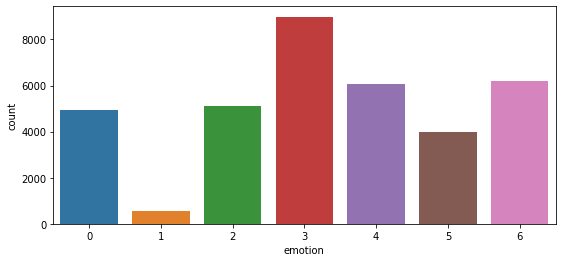

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

In [ ]:
data['emotion'].value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

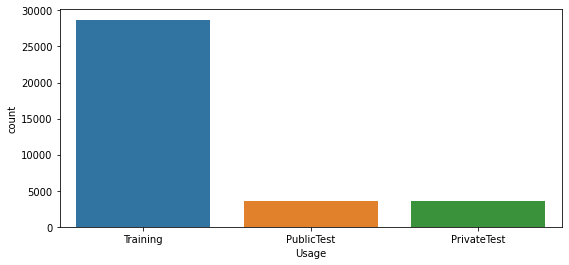

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='Usage', data=data)

In [ ]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [ ]:
groups = [g for _, g in data.groupby('Usage')]
train = groups[2] 
val = groups[1]
test = groups[0]

In [ ]:
train = train.drop(labels=['Usage'], axis=1)
val = val.drop(labels=['Usage'], axis=1)
test = test.drop(labels=['Usage'], axis=1)

In [ ]:
Y_train = train["emotion"]
Y_val = val["emotion"]
Y_test = test["emotion"]

#'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'#

X_train = train["pixels"]
X_val = val["pixels"]
X_test = test["pixels"]

> Preprocessing



1. Reshape images
2. Missing Data





---



※  Data Imbalance

We noticed that there is data imbalance in FER-2013 dataset, "Happy" having far more data compared to "Disgust". To reduce the imbalance, we searched for several ways and came across this reference, "https://www.kaggle.com/rarb1ack/ml-group-project-emotion-recognition". 

The reference tried SMOTE (Synthetic Minority Oversampling Technique) for data imbalance. This method selects examples of data in the feature space (a data point and its nearest neighbor), and then creates a synthetic data point in-between them. In essence, this is an augmentation technique to add varying copies of existing data.

However, the reference states, "
We tried to mitigate the bias with SMOTE but the results were **not satisfactory** due to low quality generated. What can be done instead is to remove the disgust label, as already mentioned, and equalize the size of other labels to the second lowest representative."


Our objective is to detect the  7 human standard emotions, including "Disgust". Therefore, even though we know we have low data of "Disgust", we left the imbalance as it is because we didn't want to remove "Disgust". For other solutions, we didn't want to create the problem of overfitting.


In [ ]:
def preprocess(X):
    X = np.array([np.fromstring(image, np.uint8, sep=' ') for image in X])
    X = X/255.0
    X = X.reshape(-1, 48, 48, 1)
    return X

In [ ]:
X_train = preprocess(X_train)
X_val = preprocess(X_val)
X_test = preprocess(X_test)

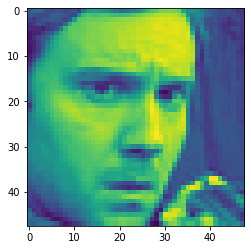

In [ ]:
plt.imshow(X_train[0][:,:,0])

In [ ]:
print("Is any label null in training set:", Y_train.isnull().any())
print("Is any label null in validation set:", Y_val.isnull().any())
print("Is any label null in testing set:", Y_test.isnull().any())


Y_train = to_categorical(Y_train, num_classes=7)
Y_val = to_categorical(Y_val, num_classes=7)
Y_test = to_categorical(Y_test, num_classes=7)

Is any label null in training set: False
Is any label null in validation set: False
Is any label null in testing set: False


> Modeling
 


**Trial 1**

* Batch Size : 100
* Epoch : 30
* Optimizer : 'Adam'
* Optimizer Learning Rate : 0.001
* Drop-out Rate : 0.5 

In [ ]:
def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding="Same", activation='relu', input_shape=(48,48,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="Same", activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2))) 
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), padding="Same", activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2))) 
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

  return model

In [ ]:
model = create_model()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_9 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_55 (Conv2D)          (None, 48, 48, 32)        25632     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 24, 24, 64)       

Used the two callbacks. 
* ReduceLROnPlateau callback: reduce the learning rate during train model. 
* ModelCheckpoint: use to save the best model which has the lowest validation loss.

In [ ]:
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Nadam,Adagrad

lr_anneal = ReduceLROnPlateau(monitor = 'val_accuracy', patience=3, factor=0.2, min_lr=1e-6)

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/dataset/EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=0)

In [ ]:
history = model.fit(
    X_train, 
    Y_train, 
    validation_data=[X_val, Y_val], 
    epochs=30, 
    batch_size = 100, 
    callbacks=[checkpoint,lr_anneal])

Epoch 1/30
288/288 [==============================] - 24s 79ms/step - loss: 1.9030 - accuracy: 0.2675 - val_loss: 1.8338 - val_accuracy: 0.2502 - lr: 0.0010
Epoch 2/30
288/288 [==============================] - 23s 78ms/step - loss: 1.6116 - accuracy: 0.3642 - val_loss: 1.7756 - val_accuracy: 0.3282 - lr: 0.0010
Epoch 3/30
288/288 [==============================] - 22s 78ms/step - loss: 1.4418 - accuracy: 0.4366 - val_loss: 1.4543 - val_accuracy: 0.4480 - lr: 0.0010
Epoch 4/30
288/288 [==============================] - 22s 78ms/step - loss: 1.3372 - accuracy: 0.4763 - val_loss: 1.3633 - val_accuracy: 0.4815 - lr: 0.0010
Epoch 5/30
288/288 [==============================] - 22s 78ms/step - loss: 1.2817 - accuracy: 0.4978 - val_loss: 1.2785 - val_accuracy: 0.4968 - lr: 0.0010
Epoch 6/30
288/288 [==============================] - 22s 78ms/step - loss: 1.2363 - accuracy: 0.5159 - val_loss: 1.2524 - val_accuracy: 0.5163 - lr: 0.0010
Epoch 7/30
288/288 [==============================] - 23s 

**Result**

In [ ]:
score, acc = model.evaluate(X_test, Y_test, batch_size=100)
print('Test score:', score)
print("Test accuracy:", acc)

36/36 [==============================] - 1s 24ms/step - loss: 1.0263 - accuracy: 0.6542
Test score: 1.02628493309021
Test accuracy: 0.65422123670578


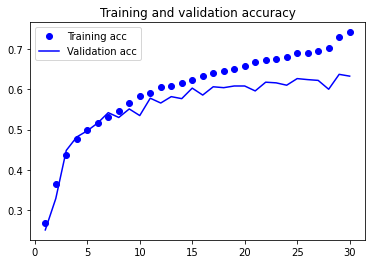

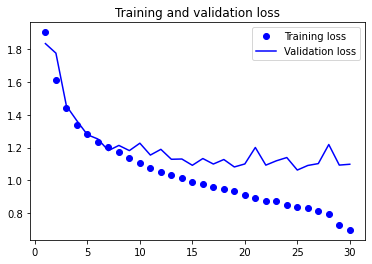

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

classifier = KerasClassifier(build_fn = create_model, epochs=5, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


**Trial 2**

Hyperparameter : Grid Search 

(tuning technique that attempts to compute the optimum values of hyperparamenter)

* Batch Size : 50, 100, 150, 200
* Epoch : 30
* Optimizer : 'SGD', 'RMSprop', 'Adagrad', 'Adam', 'Nadam'
* Optimizer Learning Rate : 0.001
* Drop-out Rate : 0.5 

※ For large number of epoch, we had the problem of memory allocation and the session was cut off in the middle of performing the task on Colab. For epoch 5 and 10, this problem didn't occur, but for more than 10 epoch, the problem occured. Thus, we find the optimal hyper parameter with 5 epoch. and we dicided to train final model with epoch 30. 

In [ ]:
from sklearn.model_selection import GridSearchCV
# grid search hyperparameter tunnig
batch_size = [50,100,150,200]
param_grid = dict(batch_size=batch_size)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Best: 0.493922 using {'batch_size': 50}
0.493922 (0.011320) with: {'batch_size': 50}
0.438468 (0.027413) with: {'batch_size': 100}
0.391306 (0.015967) with: {'batch_size': 150}
0.272492 (0.026432) with: {'batch_size': 200}


In [ ]:
def create_model(optimizer='Adam'):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding="Same", activation='relu', input_shape=(48,48,1)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3,3), padding="Same", activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2))) 
  model.add(Dropout(0.5))
  model.add(Conv2D(128, (3,3), padding="Same", activation='relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (5,5), padding="Same", activation='relu'))
  model.add(MaxPooling2D((2,2))) 
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(7, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

  return model

In [ ]:
classifier1 = KerasClassifier(build_fn = create_model, epochs=5, batch_size=50, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [ ]:
# grid search hyperparameter tunnig
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=classifier1, param_grid=param_grid, n_jobs=-10, cv=3)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.512941 using {'optimizer': 'Nadam'}
0.359643 (0.008952) with: {'optimizer': 'SGD'}
0.482776 (0.015559) with: {'optimizer': 'RMSprop'}
0.256296 (0.006779) with: {'optimizer': 'Adagrad'}
0.475043 (0.011108) with: {'optimizer': 'Adam'}
0.512941 (0.009310) with: {'optimizer': 'Nadam'}


**Final Model**

* Batch Size : 50
* Epoch : 30
* Optimizer : 'Nadam'
* Optimizer Learning Rate : 0.001
* Drop-out Rate : 0.5 

In [ ]:

model = Sequential()
model.add(Conv2D(32, (3,3), padding="Same", activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3,3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.5))
model.add(Conv2D(128, (3,3), padding="Same", activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (5,5), padding="Same", activation='relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))



In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = Nadam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/nadam.py:73: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Nadam, self).__init__(name, **kwargs)


In [ ]:
history1 = model.fit(
    X_train, 
    Y_train, 
    validation_data=[X_val, Y_val], 
    epochs=30, 
    batch_size = 50, 
    callbacks=[checkpoint,lr_anneal])

Epoch 1/30
575/575 [==============================] - 35s 57ms/step - loss: 1.7763 - accuracy: 0.2888 - val_loss: 1.7713 - val_accuracy: 0.2895 - lr: 0.0010
Epoch 2/30
575/575 [==============================] - 33s 57ms/step - loss: 1.4998 - accuracy: 0.3903 - val_loss: 1.4238 - val_accuracy: 0.4271 - lr: 0.0010
Epoch 3/30
575/575 [==============================] - 33s 57ms/step - loss: 1.3908 - accuracy: 0.4350 - val_loss: 1.4163 - val_accuracy: 0.4193 - lr: 0.0010
Epoch 4/30
575/575 [==============================] - 32s 56ms/step - loss: 1.3113 - accuracy: 0.4816 - val_loss: 1.8046 - val_accuracy: 0.2630 - lr: 0.0010
Epoch 5/30
575/575 [==============================] - 32s 56ms/step - loss: 1.2590 - accuracy: 0.5059 - val_loss: 1.2513 - val_accuracy: 0.5202 - lr: 0.0010
Epoch 6/30
575/575 [==============================] - 32s 56ms/step - loss: 1.2196 - accuracy: 0.5252 - val_loss: 1.2836 - val_accuracy: 0.5021 - lr: 0.0010
Epoch 7/30
575/575 [==============================] - 33s 

### II. Final Result

In [ ]:
score, acc = model.evaluate(X_test, Y_test, batch_size=50)
print('Test score:', score)
print("Test accuracy:", acc)

72/72 [==============================] - 1s 15ms/step - loss: 1.0577 - accuracy: 0.6495
Test score: 1.0577315092086792
Test accuracy: 0.6494845151901245


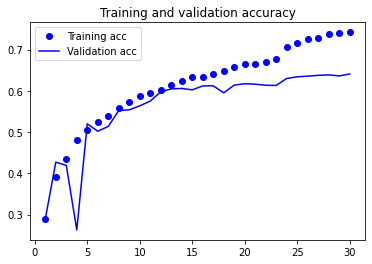

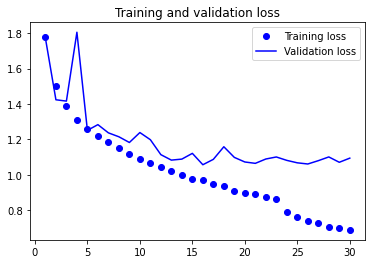

In [ ]:
# plotting the results
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

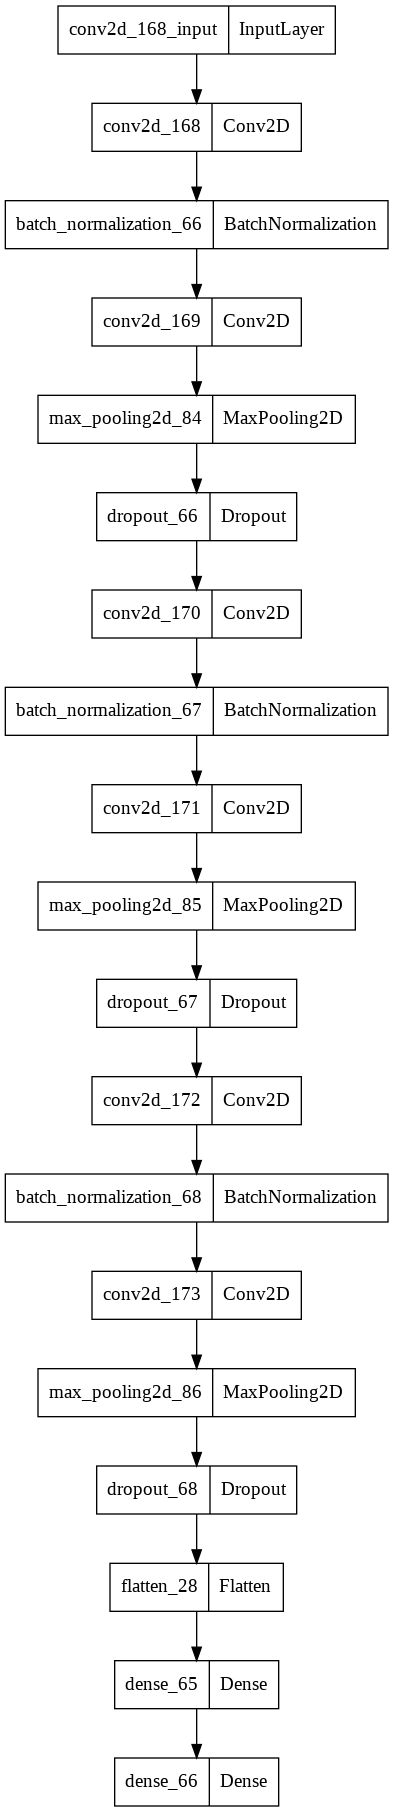

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model.png')

In [ ]:
#TESTING
from keras.models import load_model
import pickle
import numpy as np
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)   #warnings are irritating, sorry :P
class_labels=['Angry','Happy','Neutral','Sad','Surprise','Disgust','Fear']


emotdet=load_model('/content/drive/MyDrive/dataset/EmotionDetectionModelV2.h5')

In [ ]:
!pip install curtsies

     |████████████████████████████████| 53 kB 906 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 54 kB 2.1 MB/s 
  Created wheel for curtsies: filename=curtsies-0.3.10-py3-none-any.whl size=35214 sha256=2d37a4785dca0127ef88669182e6fe4f0f6dd7d1adf2aef5a13b2e721c3bfd0d
  Stored in directory: /root/.cache/pip/wheels/0a/68/71/bdac55722d0d1a909e2ea519f4f908e07759a607c7b15899da
Successfully built curtsies


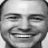

Happy
========================Original image======================


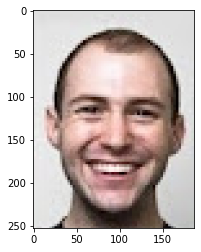

In [ ]:
from google.colab.patches import cv2_imshow
from curtsies.fmtfuncs import red, green, yellow, blue, cyan
import cv2

Img = f'/content/drive/MyDrive/dataset/happy.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

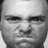

Angry
========================Original image======================


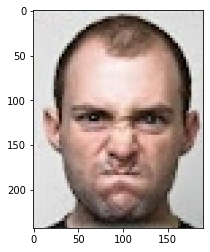

In [ ]:
Img = f'/content/drive/MyDrive/dataset/angry.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

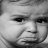

Sad
========================Original image======================


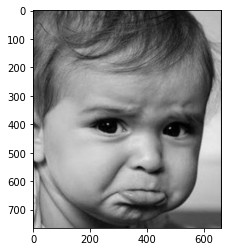

In [ ]:
Img = f'/content/drive/MyDrive/dataset/sad_baby.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

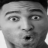

Surprise
========================Original image======================


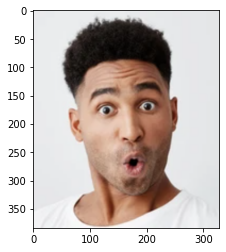

In [ ]:
Img = f'/content/drive/MyDrive/dataset/surprise.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

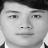

Neutral
========================Original image======================


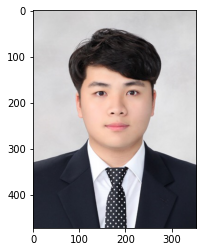

In [ ]:
Img = f'/content/drive/MyDrive/dataset/me.jpg'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

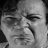

Angry
========================Original image======================


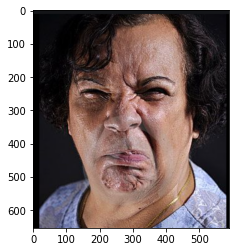

In [ ]:
Img = f'/content/drive/MyDrive/dataset/disguste.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

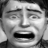

Surprise
========================Original image======================


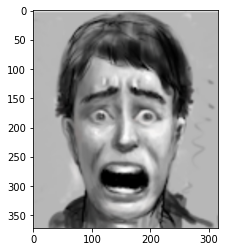

In [ ]:
Img = f'/content/drive/MyDrive/dataset/fear.png'
face = extract_face(Img)
face=cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
face=cv2.resize(face, (48,48), interpolation = cv2.INTER_AREA)
cv2_imshow(face)
face=face.astype('float')/255.0
face=img_to_array(face)
face=np.expand_dims(face,axis=0)
preds=emotdet.predict(face)
plt.imshow(Image.open(Img))
pred=preds[0]
print(cyan(class_labels[pred.argmax()]))
print('========================Original image======================')

### III. Analysis

Our first trial resulted the accuracy of 65.4% and our final model after grid search resulted the accuracy of 64.9%. As you can see, even with hyperparameter tuning, there is not much difference in the performance of the model. Thus, since modifying the hyperparameters is not enough to improve the performance, we thought other different methods or techniques are needed to be implemented such as using other datasets than FER-2013. 

Also, we noticed that "Fear" had the tendency to be classified as "Surprise". It seems these 2 emotions are hard for the model to distinguish and we need to find a way to solve this problem for future improvement.

##Part 3 - Music Recommendation

Recommend songs based on emotions by using K-means clustering based on music features 

<br>

### I. Trials & Choices



> Trial 1:

We first wanted to recommend music based on the 7 emotions we detect. However, we realized that it is not possible, or rather it is very subjective. 



---



We searched numerous scholar articles and other reference materials, but we couldn't find any that actually recommended music based on the human standard 7 emotions (happy, sad, angry, surprise, fear, disgust, neutral).

Even if we classified music with 7 clusters based on the music features (danceability, valence, loudness etc) and get high accuracy, it is still very subjective and ambigous as in "are the songs really well classifed? Is really angry songs given as a result to angry facial emotion? What is angry music? What is disgusted music?". 


As many other reference papers, "SentiMozart: Music Generation based on Emotions" also merged the 7 emotions into 3 categories: 

Happy, Sad, Neutral.


 <img src="https://drive.google.com/uc?id=1AFhqiCMf5tmbiqt4wO-5H2sf3CnJBVks" width="400">
 
 <img src="https://drive.google.com/uc?id=1HxuKySqY_yMKZ3sl0AYl4tQpKrjcEDbO" width="400">
 

Rating Scale:


 <img src="https://drive.google.com/uc?id=1MrAHYw-YYDQxIKvove8Nkrgj9CJHY_wD" width="700">

<br>
Reference: Rishi Madhok,Shivali Goel, Shweta Garg. (2018). SentiMozart: Music Generation based on Emotions.

<br>


Also in other references, each of them classified music differently than the standard human emotions. 

> Thayer's Model of Mood
 
 <img src="https://drive.google.com/uc?id=1xumEn5MedZ-coEZLIdyJABu67qEE1JSg" width="400">


In most existing methods of music mood classification, the moods of songs are divided according to psychologist Robert Thayer’s traditional model of mood. The model divides songs along the lines of energy and stress, from happy to sad and calm to energetic, respectively.

<br>

In reference site that classified music based on Thayer's Model of Mood, the result was as below where Happy, Energetic, Calm showed high accuracy while others not that much. Also, the site stated, "However, it is likely that pieces identified incorrectly may have been placed in neighboring moods – for example a calm song may be wrongly identified as contentment. These areas of the mood scale may be difficult for even a trained expert to discern between."


 <img src="https://drive.google.com/uc?id=19SmsZmoeub5DRRugHInktDYJN_ulScbw" width="500">

<br>
Reference: https://sites.tufts.edu/eeseniordesignhandbook/2015/music-mood-classification/


> Thayer's Model of Arousal-Valence: 

: shows how emotions are represented by valence and arousal(energy)



 <img src="https://drive.google.com/uc?id=1lDJp3ypxlY37xa7bw4jHtnONQprOpZ-S" width="400"> 


> Primary Emotion Arousal-Valence Thayer's Model


 
 
 <img src="https://drive.google.com/uc?id=1GkKSZ9I_SHkdXJlmoGrkigpjGkiqW9Ed" width="400">


The reference paper classified music into 4 categories (Angry, Happy, Sad, Relax), but resulted in an accuracy of 40 %

<br>
Reference: Putu Bayu Wira Brataa, Dewa Made Bayu, Atmaja Darmawan. (Volume 9 No. 3).(2021, February). Mood Classification of Balinese Songs with the KMeans Clustering Method Based on the Audio-Content Feature. 





> Clustering Music Features


 <img src="https://drive.google.com/uc?id=1qB3Z75e_DetwkI9DLnnZ3-YUB29f68Uq" width="500">

<br>
Reference: Sandy Benito, Antoine Carr, Reinaldo Sanchez-Arias. Music Data Mining using Audio Features Extracted from Spotify. https://www.reisanar.com/files/poster_Benito_Carr_v5.pdf 



As you can see, there is no fixed way of classifying music based on emotions. Instead of using the human standard 7 emotions we liked to classify music with, many studies used different emotions/moods classification proving how subjective and ambigous it is.


> Trial 2:

Therefore, we decided to use the 2 general emotions that are most distinctly different from each other; Happy and Sad. The references we found all included these 2 emotions and we thought the scale from the two emotions is very clear to classify and recommend music based on it. 


We implemented K-means clustering for the recommendation based on the 2 representatitive music features ('Energy', 'Valence') to classify music into "Happy" or "Sad" and selected corresponding 10 songs randomly.

*   Emotion: Happy -> Music: Happy 
*   Emotion: Sad   -> Music: Sad


"People like to listen to sad music especially after the beginning of a negative mood. Research has found that one of the main reasons why people listen to sad music when they are already hurting is because they experience some kind of connection"

<br>
Reference: https://www.psychologs.com/article/why-do-we-listen-to-sad-music-when-we-are-hurting

In [2]:
!pip install lightgbm

MinMaxScaler: used to normalize the music features values


Light GBM: used for fast computation and to handle large amounts of data in a limited memory resources of Colab environment. it is for checking the result of clustering.

*   tree-based learning algorithm with a Gradient Boosting framework 
*   extends the tree vertically (others : horizontal)
*   leaf-wise algorithm (others : level-wise)

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt


data=pd.read_csv('/content/drive/MyDrive/dataset/data_spotifyV2.csv')
data.drop_duplicates(inplace=True,subset=['name'])
name=data['name']
col_features = [ 'energy', 'valence']
# 'danceability',, 'loudness','tempo','liveness'
X = MinMaxScaler().fit_transform(data[col_features])
kmeans = KMeans(init="k-means++",
                n_clusters=2,
                random_state=15).fit(X)
data['kmeans'] = kmeans.labels_
data['song_name']=name

Text(0, 0.5, 'valence')

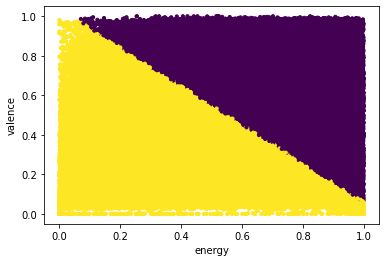

In [6]:
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.xlabel('energy')
plt.ylabel('valence')

Plot of class 1 (emotion = sad)

In [7]:
condition = (data.kmeans == 1)

class1 = data[condition]

class1['energy']

0         0.4450
1         0.2630
2         0.1770
3         0.0946
4         0.1580
           ...  
586661    0.4430
586662    0.4400
586665    0.0331
586667    0.5180
586669    0.3140
Name: energy, Length: 192298, dtype: float64

Text(0, 0.5, 'valence')

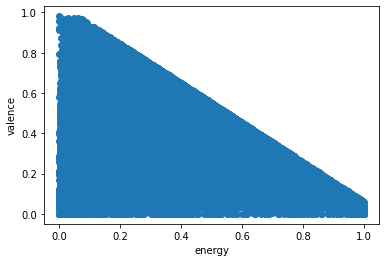

In [8]:
plt.scatter(class1['energy'],class1['valence'])
plt.xlabel('energy')
plt.ylabel('valence')

Plot of class 0 (emotion = happy)

In [9]:
condition = (data.kmeans == 0)

class0 = data[condition]

class0['energy']

6         0.355
13        0.280
14        0.289
19        0.372
28        0.408
          ...  
586656    0.605
586663    0.970
586664    0.679
586668    0.663
586670    0.615
Name: energy, Length: 254177, dtype: float64

Text(0, 0.5, 'valence')

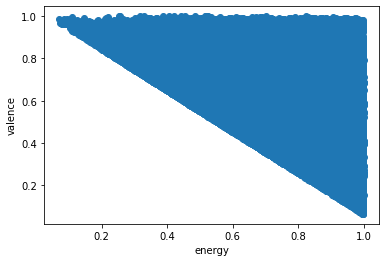

In [10]:
plt.scatter(class0['energy'],class0['valence'])
plt.xlabel('energy')
plt.ylabel('valence')

In [ ]:
og_data=data.copy()

### II. Result

In [11]:
cluster=data.groupby(by=data['kmeans'])
y=data.pop('kmeans')
x=data.drop(columns=['name','artists','id','release_date','song_name','id_artists'])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
model=LGBMClassifier().fit(x_train,y_train)
y_pred = model.predict(x_test)
model.score(x_train,y_train)

0.9991040925054352

In [12]:
model.score(x_test,y_test)

0.9986471837232013

In [13]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [14]:
cm

array([[63434,    82],
       [   69, 48034]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

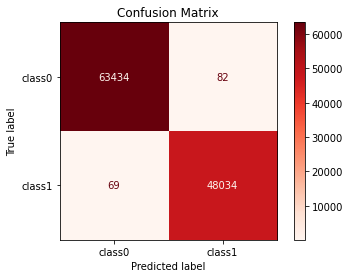

In [15]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

label=['class0','class1'] # 라벨 설정
plot = plot_confusion_matrix(model, # 분류 모델
                             x_test,y_test, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap=plt.cm.Reds, # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) # 'true', 'pred', 'all' 중에서 지정 가능. default=None
plot.ax_.set_title('Confusion Matrix')

In [ ]:
og_data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,kmeans,song_name
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1,Carve
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1,Capítulo 2.16 - Banquero Anarquista
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1,Vivo para Quererte - Remasterizado
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1,El Prisionero - Remasterizado
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1,Lady of the Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,['Gregory Oberle'],['4MxqhahGRT4BPz1PilXGeu'],2020-03-20,0.562,0.0331,1,-25.551,1,0.1030,0.996,0.961000,0.1110,0.3860,63.696,3,1,John Brown's Song
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,1,云与海
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,0,blind
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,1,What They'll Say About Us


In [ ]:
import pandas as pd 
df = og_data

EMOTIONS = ['Happy','Sad']
  
def get_results(emotion_code, NUM_RECOMMEND):
  happy_set=[]
  sad_set=[]

  if emotion_code==0:
      happy_set.append(df[df['kmeans']==0]['song_name'].sample(NUM_RECOMMEND))
      return pd.DataFrame(happy_set).T

  if emotion_code==1:
      sad_set.append(df[df['kmeans']==1]['song_name'].sample(NUM_RECOMMEND))
      return pd.DataFrame(sad_set).T

In [ ]:
emotion_word=class_labels[pred.argmax()]
print(emotion_word)


NUM_RECOMMEND=10


if emotion_word=='Happy':
    emotion_code=0

if emotion_word=='Sad':
    emotion_code=1
    
results= get_results(emotion_code,NUM_RECOMMEND)
print(results)

Happy
                                        song_name
293901                               Lovely Words
102802           The Sun Goes Down (Living It Up)
98134                                 The Stumble
106226                 Ain't Understanding Mellow
387015                           Призрачный взвод
105343  Whatcha Gonna Do With My Lovin' - Def Mix
505845                         Napot akarok látni
50579           Scenes from an Italian Restaurant
193409                               Maria Tomasa
51741                              I Need to Know


### III. Analysis

We managed to recommend music based on the 2 emotions (Happy, Sad) with the accuracy of 99.87%. With "Happy" emotion, we checked that all the 10 songs had some mood of happiness and visa-vera with "Sad".

Even though we had the problem of deciding how to classify music based on emotions and couldn't proceed our original plan (7 emotions based music recommendation), we are satisfied with Face Recognition and Emotion Detection and think it is still meaningful in the attempt go further and apply it to music recommendation. 





---


Contributions:
* Tae Hyeon Kwon: he construct the overall structure of this project with team member Su kyoung. Colab (Code Implementation; MTCNN, FaceNet (Face extract and recoginition), Construct Mood detector(with FER2013 dataset use CNN model),Make a music recommendation system with spotify dataset and he utilize lightgbm classifier to check the clustering result, and uploaded the project material in Github
* Su Kyoung Oh: Research(References) she found papers and project in googlscholar and google, also she construct the overall structure of this project with taehyeon.  Colab (Presentation), she design and inserted the content of our project in colab file. 

Github: https://github.com/TaeHyeonKwon/Lab/tree/main/AI_project


References:


*   Zhang et al, Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks, 2016
*   William, Ivan & Setiadi, De Rosal Ignatius Moses & Rachmawanto, Eko & Santoso, Heru & Sari, Atika. (2019). Face Recognition using FaceNet (Survey, Performance Test, and Comparison). 1-6. 10.1109/ICIC47613.2019.8985786
* https://www.kaggle.com/rarb1ack/ml-group-project-emotion-recognition
* Rishi Madhok,Shivali Goel, Shweta Garg. (2018). SentiMozart: Music Generation based on Emotions.
* https://sites.tufts.edu/eeseniordesignhandbook/2015/music-mood-classification/
* Putu Bayu Wira Brataa, Dewa Made Bayu, Atmaja Darmawan. (Volume 9 No. 3).(2021, February). Mood Classification of Balinese Songs with the KMeans Clustering Method Based on the Audio-Content Feature. 
* Sandy Benito, Antoine Carr, Reinaldo Sanchez-Arias. Music Data Mining using Audio Features Extracted from Spotify. https://www.reisanar.com/files/poster_Benito_Carr_v5.pdf 
* https://www.psychologs.com/article/why-do-we-listen-to-sad-music-when-we-are-hurting
